

**GRUPO <7>**

Pilar Arias, Álvaro García Cid, Yedra Martín, Amaya Sarasa


##Importamos librerías y datos

In [15]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [18]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Análisis  de texto en negrita datos

Comprobamos las dimensiones de los datos proporcionados:

In [17]:
print(train_images.shape)

(60000, 28, 28)


Efectivamente, encontramos 60000 imágenes para el entrenamiento, de 28*28 píxeles. Más adelante deberemos cambiar las dimensiones de las imágenes, para así poderlas entrar correctamente a la primera capa de la red neuronal. 

Comprobamos la longitud de las etiquetas para comprobar que están todas, tanto en las fotos de entrenamiento como en las del test:

In [19]:
len(train_labels)


60000

In [20]:
len(test_labels)

10000

Es correcto, ya que para cada imagen, se tiene asociado una etiqueta como se deseaba.

A continuación, probamos a ver cómo se vería representada la imagen número 999:

In [21]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

[[  0   0   0   0   0   0   0   0   0   0   0  97  84  97 110 108  87  97   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  19 255 199 183 142 161 200 213  32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  72 174 173 158 131 132 176 176  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 142 180 163 120 180 126 139 168 122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 156 180 162 171 170 183 163 169 144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 159 177 163 174 166 173 170 163 148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160 182 160 168 175 167 157 168 139   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 185 161 171 184 176 160 175 131   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 188 155 172 182 180 161 182 127   

Se puede asemejar a una camiseta, y efectivamente, comprobando con la etiqueta que se proporciona, se está representando de manera correcta.

In [22]:
train_labels[1000]


1

Probamos otra manera de representar la imagen. 

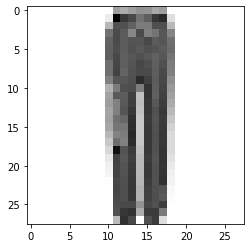

In [23]:
import matplotlib.pyplot as plt
digit = train_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

##Preparación de datos


Normalizamos las imágenes, y las representamos, para verificar que se ha realizado correctamente. 

In [24]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

60000
(60000, 784)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.38 0.33 0.38 0.43 0.42 0.34 0.38 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.07 1.   0.78 0.72 0.56 0.63 0.78 0.84 0.13 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.28 0.68 0.68 0.62 0.51 0.52 0.69 0.69 0.27 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.56 0.71 0.64 0.47 0.71 0.49 0.55 0.66 0.48 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.61 0.71 0.64 0.67 0.67 0.72 0.64 0.66 0.56 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.62 0.69 0.64 0.68 0.65 0.68 0.67 0.64 0.58 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.63 0.71 0.63 0.66 0.69 0.65 0.62 0.66 0.55 0.   0.   0.   0.   0.   0.   0.   0.   0.
 

Gracias al término one hot enconding, cambiamos el formato de las etiquetas. Lo que encontramos ahora es un vector de 10 bits, con todos los valores en 0, excepto un bit cuyo valor sea 1 cuya posición nos indicará a qué clase de ropa pertenece la imagen. 


In [25]:
def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_test_labels)


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Caso 1

Procedemos 

In [27]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


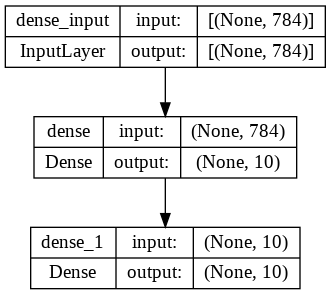

In [28]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

In [29]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [30]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4750 - accuracy: 0.5373
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8561 - accuracy: 0.7006
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7129 - accuracy: 0.7553
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6443 - accuracy: 0.7804
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6012 - accuracy: 0.7958


In [36]:
test_loss, test_acc = network.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.6040 - accuracy: 0.7939
test_loss: 0.6040225625038147
test_acc: 0.7939000129699707


In [37]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax (predictions_array)
  if predicted_label== true_label:
    color = 'blue' 
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
 

Ejemplo de uso para ver la predicción de la 6ª figura de las imágenes de test.

## Caso 2

In [38]:
from keras import models
from keras import layers
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


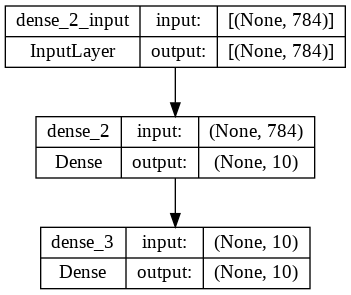

In [39]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network2, "my_first_model.png", show_shapes=True)

In [40]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [41]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network2.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.9059 - accuracy: 0.6971
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5351 - accuracy: 0.8136
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4844 - accuracy: 0.8322
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4589 - accuracy: 0.8412
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4415 - accuracy: 0.8476


In [42]:
test_loss, test_acc = network2.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4734 - accuracy: 0.8369
test_loss: 0.47342178225517273
test_acc: 0.836899995803833


## Caso 2.2

In [75]:
from keras import models
from keras import layers
network22 = models.Sequential()
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network22.add(layers.Dense(10, activation='softmax'))
network22.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


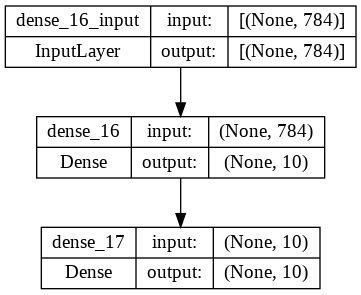

In [81]:
keras.utils.plot_model(network22, "my_first_model.png", show_shapes=True)

In [77]:
network22.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [79]:
network22.fit(train_images, one_hot_train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.8526
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4219 - accuracy: 0.8545
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8567
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8577
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8587
Epoch 6/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4032 - accuracy: 0.8608
Epoch 7/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3995 - accuracy: 0.8623
Epoch 8/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3966 - accuracy: 0.8627
Epoch 9/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3934 - accuracy: 0.8640
Epoch 10/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3911 - accuracy: 0.8643

In [80]:
test_loss, test_acc = network22.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.8495
test_loss: 0.4343358278274536
test_acc: 0.8495000004768372


## Caso 3

In [43]:
from keras import models
from keras import layers
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


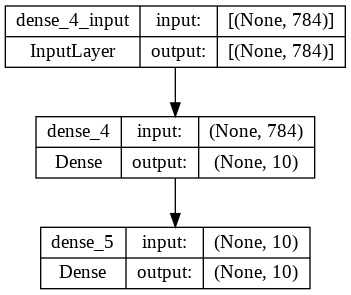

In [44]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network3, "my_first_model.png", show_shapes=True)

In [45]:
network3.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [46]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network3.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.0880 - accuracy: 0.3468
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.7678 - accuracy: 0.5284
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.5658 - accuracy: 0.5660
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 1.4203 - accuracy: 0.5996
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 1.3100 - accuracy: 0.6217


In [47]:
test_loss, test_acc = network3.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.2717 - accuracy: 0.6248
test_loss: 1.2717090845108032
test_acc: 0.6248000264167786


##Caso 3.2 

In [114]:
network32 = models.Sequential()
network32.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network32.add(layers.Dense(10, activation='softmax'))
network32.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                7850      
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


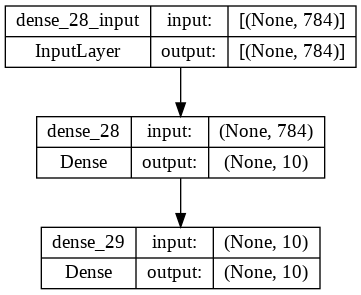

In [115]:
keras.utils.plot_model(network32, "my_first_model.png", show_shapes=True)

In [116]:
network32.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [122]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images=train_images.reshape(60000,28*28)
test_images=test_images.reshape(10000,28*28)
print(train_images[2])

[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48  88   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  12 100 212 205 185 179 173 186 193 221 142  85   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238
 226 157  68  80   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61  93  72   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76  97  73   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  75  89  80  80  67  63  73  83  80  96  72   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  77  88  77
  80  83  83  83  83  81  95  76   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85  97  84
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  93  97  81  85  84  85  87  88  84  99  87   0   0   0   0  

In [123]:
network32.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7993 - accuracy: 0.7135
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7619 - accuracy: 0.7219
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7628 - accuracy: 0.7272
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7227 - accuracy: 0.7362
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7228 - accuracy: 0.7439


In [124]:
test_loss, test_acc = network32.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.7347 - accuracy: 0.7385
test_loss: 0.7346519231796265
test_acc: 0.7384999990463257


## Caso 4

In [125]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [129]:
# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)

In [128]:
from keras import models
from keras import layers
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                7850      
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


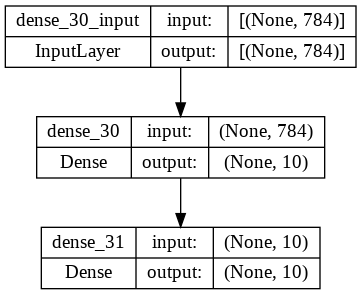

In [130]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network4, "my_first_model.png", show_shapes=True)

In [131]:
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [132]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network4.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4686 - accuracy: 0.6034
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8838 - accuracy: 0.7797
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6523 - accuracy: 0.8135
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5503 - accuracy: 0.8268
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 0.8351


In [133]:
test_loss, test_acc = network4.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5142 - accuracy: 0.8226
test_loss: 0.5142011046409607
test_acc: 0.8226000070571899


## Caso 5

In [53]:
from keras import models
from keras import layers
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


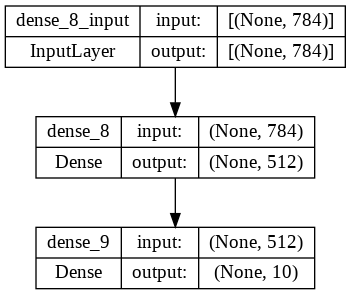

In [54]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network5, "my_first_model.png", show_shapes=True)

In [55]:
network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [56]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network5.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 1.0068 - accuracy: 0.7005
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.6535 - accuracy: 0.7908
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5786 - accuracy: 0.8112
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5382 - accuracy: 0.8214
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5113 - accuracy: 0.8296


In [57]:
test_loss, test_acc = network5.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5277 - accuracy: 0.8197
test_loss: 0.5277107954025269
test_acc: 0.8197000026702881


## Caso 6

In [58]:
from keras import models
from keras import layers
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))
network6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


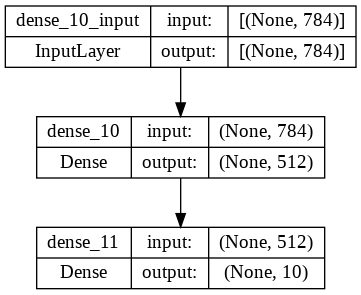

In [59]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network6, "my_first_model.png", show_shapes=True)

In [60]:
network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [61]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network6.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.5697 - accuracy: 0.7989
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3819 - accuracy: 0.8601
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3370 - accuracy: 0.8757
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3094 - accuracy: 0.8846
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2926 - accuracy: 0.8916


In [62]:
test_loss, test_acc = network6.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8749
test_loss: 0.3490770757198334
test_acc: 0.8748999834060669


## Caso 7

In [63]:
from keras import models
from keras import layers
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


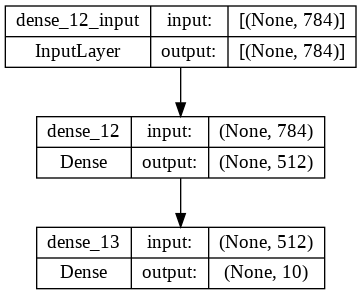

In [64]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network7, "my_first_model.png", show_shapes=True)

In [65]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [66]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network7.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 1.6989 - accuracy: 0.5727
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 1.1239 - accuracy: 0.7104
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.9204 - accuracy: 0.7298
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.8195 - accuracy: 0.7431
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.7587 - accuracy: 0.7520


In [67]:
test_loss, test_acc = network7.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7479 - accuracy: 0.7523
test_loss: 0.7479049563407898
test_acc: 0.7523000240325928


##Caso 7.2

In [82]:
network72 = models.Sequential()
network72.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network72.add(layers.Dense(10, activation='softmax'))
network72.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


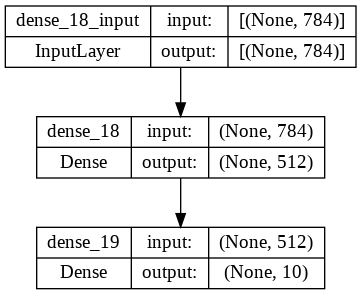

In [83]:
keras.utils.plot_model(network72, "my_first_model.png", show_shapes=True)

In [84]:
network72.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [86]:
network72.fit(train_images, one_hot_train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 8ms/step - loss: 0.8778 - accuracy: 0.7345
Epoch 2/25
469/469 [==============================] - 4s 8ms/step - loss: 0.7961 - accuracy: 0.7470
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7438 - accuracy: 0.7558
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7073 - accuracy: 0.7640
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6792 - accuracy: 0.7696
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6568 - accuracy: 0.7754
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6381 - accuracy: 0.7813
Epoch 8/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6221 - accuracy: 0.7855
Epoch 9/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6082 - accuracy: 0.7912
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.5959 - accuracy: 0.7945

In [87]:
test_loss, test_acc = network72.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5255 - accuracy: 0.8133
test_loss: 0.5255478024482727
test_acc: 0.8133000135421753


## Caso 8

In [68]:
from keras import models
from keras import layers
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


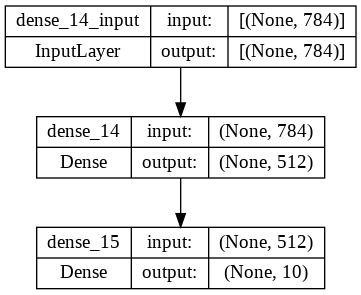

In [69]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network8, "my_first_model.png", show_shapes=True)

In [70]:
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [71]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network8.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.5926 - accuracy: 0.7904
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.4289 - accuracy: 0.8442
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3851 - accuracy: 0.8603
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3586 - accuracy: 0.8691
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3384 - accuracy: 0.8760


In [72]:
test_loss, test_acc = network8.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3877 - accuracy: 0.8590
test_loss: 0.3877131938934326
test_acc: 0.859000027179718


##Comparación predicción resultados imagen test 6

In [73]:
predictions = network.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)
predictions5 = network5.predict(test_images)
predictions6 = network6.predict(test_images)
predictions7 = network7.predict(test_images)
predictions8 = network8.predict(test_images)

313/313 [==============================] - 1s 3ms/step


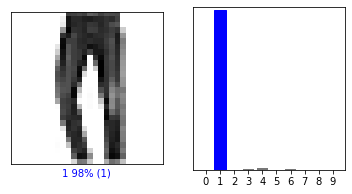

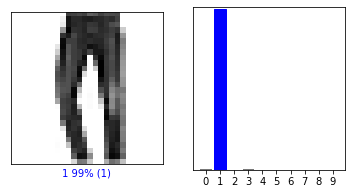

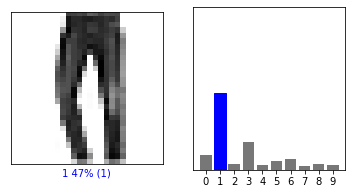

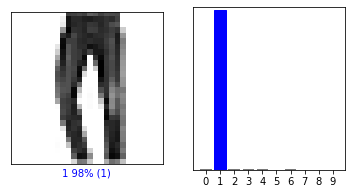

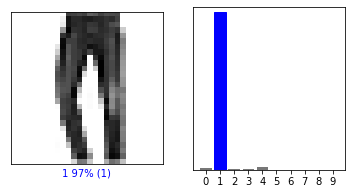

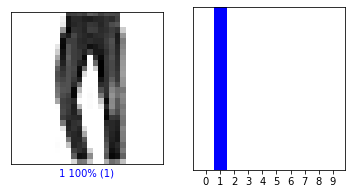

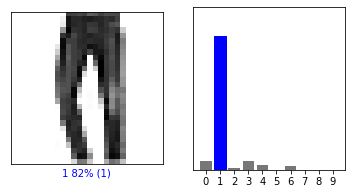

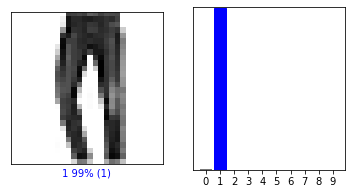

In [74]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions2[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions2[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions3[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions3[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions4[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions4[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions5[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions5[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions6[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions6[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions7[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions7[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions8[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions8[5], test_labels)
plt.show()